In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)
%matplotlib notebook

In [2]:
train_df = pd.read_csv(Path('Resources/2019loans.csv'))
test_df = pd.read_csv(Path('Resources/2020Q1loans.csv'))

In [3]:
print(f" training set shape: {train_df.shape}")
print(f" testing set shape: {test_df.shape}")

 training set shape: (12180, 86)
 testing set shape: (4702, 86)


In [4]:
train_df.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,57107,57107,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,low_risk,n,29.99,0.0,0.0,15.0,0.0,39728.0,38.0,w,12804.66,12804.66,953.33,953.33,570.34,382.99,0.0,0.0,0.0,483.34,0.0,1.0,Individual,0.0,0.0,465790.0,2.0,7.0,3.0,7.0,7.0,82290.0,70.0,1.0,1.0,24683.0,69.0,60200.0,1.0,12.0,2.0,9.0,31053.0,7317.0,77.1,0.0,0.0,160.0,350.0,3.0,3.0,1.0,3.0,8.0,0.0,1.0,4.0,2.0,5.0,18.0,7.0,17.0,4.0,15.0,0.0,0.0,0.0,5.0,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,141451,141451,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,low_risk,n,11.26,2.0,0.0,16.0,0.0,9585.0,20.0,w,15152.97,15152.97,10037.02,10037.02,5847.03,4189.99,0.0,0.0,0.0,478.68,0.0,1.0,Individual,0.0,0.0,60769.0,0.0,2.0,0.0,1.0,17.0,18311.0,52.0,0.0,4.0,4311.0,50.0,20900.0,1.0,0.0,1.0,5.0,3798.0,6990.0,56.0,0.0,0.0,165.0,142.0,13.0,13.0,1.0,17.0,10.0,1.0,5.0,8.0,6.0,7.0,5.0,13.0,14.0,8.0,16.0,0.0,0.0,0.0,0.0,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,321143,321143,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,low_risk,n,11.28,0.0,0.0,12.0,0.0,16708.0,36.0,w,15724.23,15724.23,6971.52,6971.52,4275.77,2695.75,0.0,0.0,0.0,448.95,0.0,1.0,Individual,0.0,0.0,617946.0,1.0,7.0,1.0,2.0,5.0,97335.0,108.0,0.0,0.0,11026.0,98.0,25900.0,2.0,0.0,2.0,3.0,51496.0,5892.0,73.9,0.0,0.0,254.0,239.0,30.0,5.0,3.0,173.0,5.0,1.0,3.0,3.0,3.0,5.0,26.0,4.0,7.0,3.0,12.0,0.0,0.0,0.0,1.0,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,11778,11778,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,low_risk,n,18.08,0.0,0.0,12.0,1.0,8809.0,19.0,w,2930.77,2930.77,81.63,81.63,69.23,12.40,0.0,0.0,0.0,85.76,1.0,1.0,Individual,0.0,568.0,20761.0,2.0,4.0,2.0,2.0,8.0,11952.0,78.0,2.0,4.0,2409.0,49.0,26600.0,4.0,4.0,2.0,6.0,1730.0,13470.0,32.3,0.0,0.0,135.0,146.0,2.0,2.0,0.0,2.0,8.0,0.0,5.0,6.0,6.0,6.0,8.0,8.0,11.0,6.0,12.0,0.0,0.0,0.0,4.0,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,169382,169382,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,low_risk,n,27.77,0.0,2.0,13.0,0.0,65420.0,51.0,w,20778.03,20778.03,14763.99,14763.99,9221.97,5542.02,0.0,0.0,0.0,1056.49,0.0,1.0,Individual,0.0,0.0,237839.0,2.0,3.0,1.0,3.0,5.0,43636.0,74.0,1.0,1.0,19804.0,74.0,88100.0,2.0,11.0,3.0,4.0,18295.0,18517.0,76.7,0.0,0.0,174.0,369.0,1.0,1.0,2.0,34.0,0.0,0.0,6.0,9.0,6.0,19.0,17.0,9.0,32.0,9.0,13.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N


In [5]:
test_df.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,67991,67991,40000.0,0.0819,814.70,MORTGAGE,140000.0,Not Verified,low_risk,n,19.75,0.0,1.0,18.0,0.0,9471.0,45.0,w,33249.95,33249.95,9740.00,9740.00,6750.05,2989.95,0.0,0.0,0.0,814.70,0.0,1.0,Individual,0.0,0.0,377773.0,1.0,6.0,1.0,2.0,9.0,61443.0,51.0,1.0,1.0,3218.0,26.0,86500.0,0.0,2.0,1.0,3.0,20987.0,65129.0,12.7,0.0,0.0,192.0,180.0,2.0,2.0,3.0,44.0,2.0,0.0,6.0,6.0,6.0,10.0,20.0,11.0,22.0,6.0,18.0,0.0,0.0,0.0,2.0,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0,N,N
1,25429,25429,6000.0,0.1524,208.70,RENT,55000.0,Not Verified,low_risk,n,11.52,2.0,0.0,8.0,0.0,1280.0,12.0,w,0.00,0.00,6185.59,6185.59,6000.00,185.59,0.0,0.0,0.0,5773.27,0.0,1.0,Individual,0.0,0.0,23460.0,1.0,1.0,1.0,1.0,6.0,22180.0,94.0,0.0,1.0,713.0,68.0,11000.0,1.0,1.0,3.0,2.0,2933.0,4680.0,20.7,0.0,0.0,143.0,144.0,22.0,6.0,0.0,59.0,6.0,0.0,2.0,3.0,2.0,2.0,3.0,7.0,9.0,3.0,8.0,0.0,0.0,0.0,1.0,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0,N,N
2,38496,38496,3600.0,0.1695,128.27,RENT,42000.0,Not Verified,low_risk,n,6.74,0.0,0.0,6.0,0.0,4757.0,6.0,w,0.00,0.00,3603.73,3603.73,3600.00,3.73,0.0,0.0,0.0,3607.12,0.0,1.0,Individual,0.0,0.0,19183.0,0.0,3.0,0.0,0.0,40.0,14426.0,96.0,1.0,2.0,4757.0,83.0,8100.0,0.0,0.0,2.0,2.0,3837.0,2543.0,65.2,0.0,0.0,54.0,107.0,9.0,9.0,0.0,9.0,7.0,0.0,1.0,1.0,2.0,2.0,3.0,3.0,3.0,1.0,6.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0,N,N
3,19667,19667,20000.0,0.1524,478.33,RENT,100000.0,Not Verified,low_risk,n,12.13,0.0,2.0,7.0,0.0,12731.0,21.0,w,17624.06,17624.06,4766.37,4766.37,2375.94,2390.43,0.0,0.0,0.0,478.33,0.0,1.0,Individual,0.0,0.0,43817.0,1.0,2.0,1.0,3.0,11.0,31086.0,86.0,3.0,3.0,5917.0,78.0,20500.0,0.0,3.0,3.0,6.0,7303.0,6496.0,52.9,0.0,0.0,132.0,290.0,4.0,4.0,0.0,7.0,5.0,0.0,2.0,4.0,3.0,8.0,8.0,5.0,12.0,4.0,7.0,0.0,0.0,0.0,4.0,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0,N,N
4,37505,37505,3600.0,0.1240,120.27,RENT,50000.0,Not Verified,low_risk,n,16.08,0.0,3.0,6.0,0.0,10413.0,6.0,w,0.00,0.00,3602.48,3602.48,3600.00,2.48,0.0,0.0,0.0,3604.96,0.0,1.0,Individual,0.0,0.0,32448.0,2.0,2.0,1.0,1.0,9.0,22035.0,88.0,2.0,2.0,5985.0,71.0,21000.0,3.0,1.0,14.0,3.0,5408.0,10587.0,49.6,0.0,0.0,40.0,159.0,3.0,3.0,0.0,3.0,3.0,0.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,6.0,0.0,0.0,0.0,3.0,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0,N,N


In [6]:
#categoriccal data headers in training set
train_cat_headers = train_df.columns[train_df.dtypes=="object"]
#number of unique values in each categorical feature
train_df[train_cat_headers].nunique()

home_ownership          4
verification_status     3
loan_status             2
pymnt_plan              1
initial_list_status     2
application_type        2
hardship_flag           2
debt_settlement_flag    2
dtype: int64

In [9]:
#repeat for testting set
test_cat_headers = test_df.columns[test_df.dtypes=="object"]
test_df[test_cat_headers].nunique()

home_ownership          4
verification_status     3
loan_status             2
pymnt_plan              1
initial_list_status     2
application_type        2
hardship_flag           2
debt_settlement_flag    1
dtype: int64

In [10]:
#create a dataframe to compare categorical data in training and testing set
compare_df = pd.DataFrame({"train_df":train_df[train_cat_headers].nunique(),
                          "test_df":test_df[test_cat_headers].nunique()})
print(train_df['debt_settlement_flag'].unique())
print(test_df['debt_settlement_flag'].unique())
compare_df

['N' 'Y']
['N']


,train_df,test_df
home_ownership,4,4
verification_status,3,3
loan_status,2,2
pymnt_plan,1,1
initial_list_status,2,2
application_type,2,2
hardship_flag,2,2
debt_settlement_flag,2,1


__Observation__: debt_settlement_flag feature does not have 2 unique values in testing set, as a result after one hot encoding X_test will have one less column than X_train. The missing columns must be added to X_test 

In [12]:
# dropping index columns and loan_staus columns to prepare X_train and X_test
X_train = train_df.drop(['Unnamed: 0','index','loan_status'], axis=1)
X_train = pd.get_dummies(X_train, drop_first=True)
print(X_train.shape)

X_test = test_df.drop(['Unnamed: 0','index','loan_status','pymnt_plan'], axis=1)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_test.shape)

(12180, 85)
(4702, 84)


__Adding missing feature to X_test__

In [13]:
X_test['debt_settlement_flag_Y'] = 0
print(X_test.shape)

(4702, 85)


In [14]:
X_train.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_in

In [15]:
X_test.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_in

__Check if all X_train columns are present in X_test__. 


In [17]:
np.setdiff1d(X_train.columns, X_test.columns)

array([], dtype=object)

Empty array indicates all X_train columns are present in X_test

In [12]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(train_df["loan_status"])
print(le.classes_)
print(y_train)
y_test = le.fit_transform(test_df["loan_status"])
print(y_test)
test_df["loan_status"].value_counts()

['high_risk' 'low_risk']
[1 1 1 ... 0 0 0]
[1 1 1 ... 0 0 0]


high_risk    2351
low_risk     2351
Name: loan_status, dtype: int64

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_train,y_train)

/Users/mohanpanga/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6497536945812807

0.5157379838366652


<IPython.core.display.Javascript object>


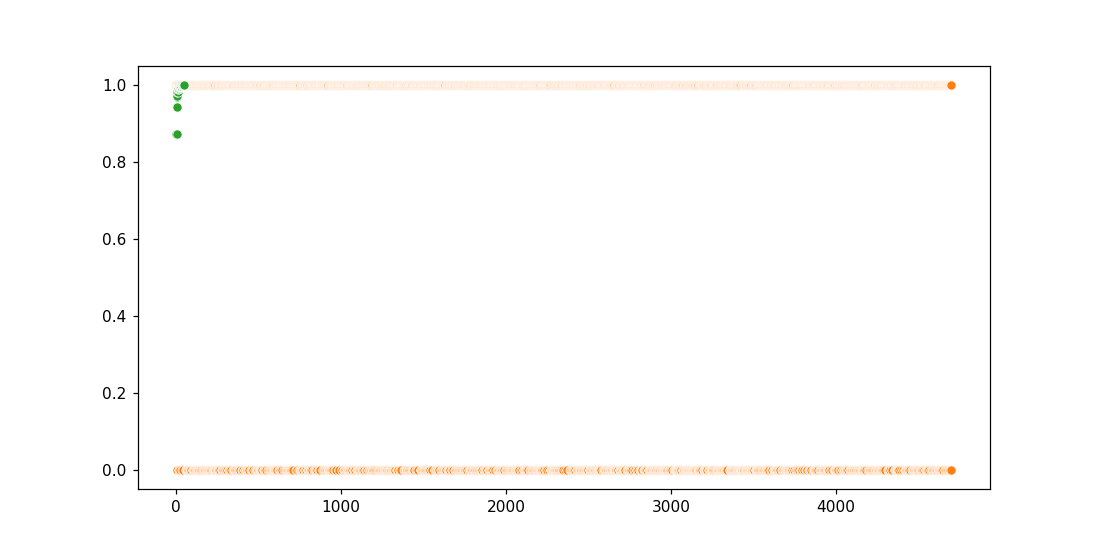

/Users/mohanpanga/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mohanpanga/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

In [14]:
y_pred = model.predict(X_test)
print(model.score(X_test,y_test))
_,ax = plt.subplots(figsize=(10,5))
x=np.arange(0,len(test_df))
sns.scatterplot(x,y_test,ax=ax)
sns.scatterplot(x,y_pred,ax=ax)


In [48]:
from sklearn.ensemble import RandomForestClassifier
scores_train = []
scores_test = []
for i in range(1,50):
    clf = RandomForestClassifier(n_estimators=i, random_state=0)
    clf.fit(X_train,y_train)
    scores_train.append(clf.score(X_train, y_train))
    scores_test.append(clf.score(X_test,y_test))
    print(clf.score(X_train, y_train))
    
#     clf.predict(X_test)
x=range(1,50)
sns.scatterplot(x,scores_train)
plt.show()

0.872495894909688
0.8741379310344828
0.9425287356321839
0.94376026272578
0.9701149425287356
0.9710180623973728
0.9816091954022989
0.9822660098522168
0.989983579638752
0.9895730706075534
0.9931855500821019
0.9926929392446634
0.9945812807881773
0.9954022988505747
0.99688013136289
0.9970443349753695
0.9978653530377668
0.9975369458128078
0.9980295566502463
0.9981116584564861
0.9987684729064039
0.9985221674876847
0.9989326765188834
0.9990968801313629
0.9991789819376026
0.9995073891625615
0.9991789819376026
0.9992610837438424
0.9990968801313629
0.9992610837438424
0.9992610837438424
0.9995073891625615
0.9995073891625615
0.999671592775041
0.9995073891625615
0.9995894909688013
0.999671592775041
0.9997536945812808
0.999671592775041
0.9997536945812808
0.9997536945812808
0.9998357963875205
0.999671592775041
0.9997536945812808
0.9997536945812808
0.9998357963875205
0.9999178981937603
0.9999178981937603
0.9999178981937603


/Users/mohanpanga/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 2.20755943, -1.12001617,  1.0371484 , ..., -0.41370744,
        -0.17149859, -0.02026518],
       [-1.11348584,  0.21833096, -1.01983876, ..., -0.41370744,
        -0.17149859, -0.02026518],
       [-1.34791257,  0.54295132, -1.2928478 , ..., -0.41370744,
        -0.17149859, -0.02026518],
       ...,
       [-0.72277464,  1.7009538 , -0.41340093, ..., -0.41370744,
        -0.17149859, -0.02026518],
       [-0.91813024,  0.85997823, -1.02947877, ..., -0.41370744,
        -0.17149859, -0.02026518],
       [ 1.23078141,  1.22636262,  2.08478621, ..., -0.41370744,
        -0.17149859, -0.02026518]])

In [45]:
clf_scaled = RandomForestClassifier(n_estimators=20, random_state=0)
clf_scaled.fit(X_train_scaled,y_train)
print(clf_scaled.score(X_train_scaled,y_train))
clf_scaled.score(X_test_scaled,y_test)

0.9981937602627258


0.6242024670353041

In [44]:
model_scaled = LogisticRegression()
model_scaled.fit(X_train_scaled,y_train)
print(model_scaled.score(X_train_scaled,y_train))
print(model_scaled.score(X_test_scaled,y_test))

0.7083743842364532
0.7681837515950659


/Users/mohanpanga/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [86]:
test_df
print(test_df['pymnt_plan'].unique())
X_test = test_df.drop(['Unnamed: 0','index','loan_status','pymnt_plan'], axis=1)
print(X_test.shape)
print(X_test.columns[X_test.dtypes == "object"])
X_test = pd.get_dummies(X_test)
len(X_test.columns)


['n']
(4702, 82)
Index(['home_ownership', 'verification_status', 'initial_list_status',
       'application_type', 'hardship_flag', 'debt_settlement_flag'],
      dtype='object')


90

In [87]:
train_df.columns

Index(['Unnamed: 0', 'index', 'loan_amnt', 'int_rate', 'installment',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'pymnt_plan', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_ol

In [88]:
print(train_df.head())
train_df.shape
train_df.columns
train_df.dtypes[train_df.dtypes=="object"].index


   Unnamed: 0   index  loan_amnt  int_rate  installment home_ownership  \
0       57107   57107    13375.0    0.1797       483.34       MORTGAGE   
1      141451  141451    21000.0    0.1308       478.68       MORTGAGE   
2      321143  321143    20000.0    0.1240       448.95       MORTGAGE   
3       11778   11778     3000.0    0.1240       100.22           RENT   
4      169382  169382    30000.0    0.1612      1056.49       MORTGAGE   

   annual_inc verification_status loan_status pymnt_plan    dti  delinq_2yrs  \
0    223000.0        Not Verified    low_risk          n  29.99          0.0   
1    123000.0     Source Verified    low_risk          n  11.26          2.0   
2    197000.0     Source Verified    low_risk          n  11.28          0.0   
3     45000.0        Not Verified    low_risk          n  18.08          0.0   
4    133000.0     Source Verified    low_risk          n  27.77          0.0   

   inq_last_6mths  open_acc  pub_rec  revol_bal  total_acc  \
0           

Index(['home_ownership', 'verification_status', 'loan_status', 'pymnt_plan',
       'initial_list_status', 'application_type', 'hardship_flag',
       'debt_settlement_flag'],
      dtype='object')

In [89]:
# Convert categorical data to numeric and separate target feature for training data
print(train_df.head())
X =pd.get_dummies(train_df)
X.columns


   Unnamed: 0   index  loan_amnt  int_rate  installment home_ownership  \
0       57107   57107    13375.0    0.1797       483.34       MORTGAGE   
1      141451  141451    21000.0    0.1308       478.68       MORTGAGE   
2      321143  321143    20000.0    0.1240       448.95       MORTGAGE   
3       11778   11778     3000.0    0.1240       100.22           RENT   
4      169382  169382    30000.0    0.1612      1056.49       MORTGAGE   

   annual_inc verification_status loan_status pymnt_plan    dti  delinq_2yrs  \
0    223000.0        Not Verified    low_risk          n  29.99          0.0   
1    123000.0     Source Verified    low_risk          n  11.26          2.0   
2    197000.0     Source Verified    low_risk          n  11.28          0.0   
3     45000.0        Not Verified    low_risk          n  18.08          0.0   
4    133000.0     Source Verified    low_risk          n  27.77          0.0   

   inq_last_6mths  open_acc  pub_rec  revol_bal  total_acc  \
0           

Index(['Unnamed: 0', 'index', 'loan_amnt', 'int_rate', 'installment',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc'

In [ ]:
# Convert categorical data to numeric and separate target feature for testing data

In [ ]:
# add missing dummy variables to testing set

In [ ]:
# Train the Logistic Regression model on the unscaled data and print the model score

In [ ]:
# Train a Random Forest Classifier model and print the model score

In [ ]:
# Scale the data

In [ ]:
# Train the Logistic Regression model on the scaled data and print the model score

In [ ]:
# Train a Random Forest Classifier model on the scaled data and print the model score